In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import json
from collections import Counter

In [2]:
coco_path = Path("./coco_sample/")
image_dir = coco_path / "train_sample"
annotations_dir = coco_path / "annotations"

print(f"Số lượng hình ảnh: {len(os.listdir(image_dir))}")
print(f"Các tệp chú thích: {os.listdir(annotations_dir)}")

FileNotFoundError: [Errno 2] No such file or directory: 'coco_sample/train_sample'

In [ ]:
# Đọc tệp chú thích
annotations_file = annotations_dir / "train_sample.json"
with open(annotations_file) as f:
    annotations = json.load(f)

# Kiểm tra các khóa trong tệp chú thích
print(annotations.keys())

dict_keys(['categories', 'annotations', 'images'])


In [ ]:
# Số lượng đối tượng được chú thích
print(f"Số lượng đối tượng được chú thích: {len(annotations['annotations'])}")

# Đếm số lượng đối tượng theo loại
category_count = Counter([ann["category_id"] for ann in annotations["annotations"]])
category_names = {cat["id"]: cat["name"] for cat in annotations["categories"]}

# Hiển thị kết quả
for cat_id, count in category_count.items():
    print(f"{category_names[cat_id]}: {count} đối tượng")

Số lượng đối tượng được chú thích: 87106
tv: 5805 đối tượng
book: 24715 đối tượng
chair: 38491 đối tượng
vase: 6613 đối tượng
remote: 5703 đối tượng
couch: 5779 đối tượng


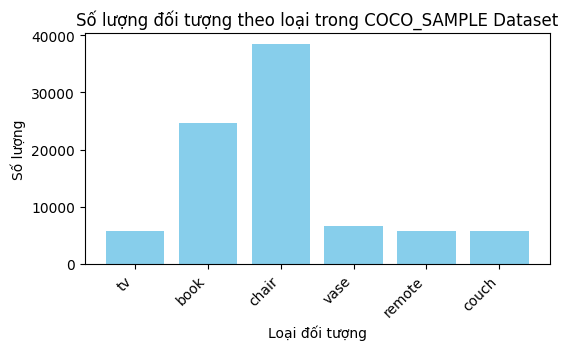

In [ ]:
category_labels = [category_names[cat_id] for cat_id in category_count.keys()]
category_values = [category_count[cat_id] for cat_id in category_count.keys()]

plt.figure(figsize=(6, 3))
plt.bar(category_labels, category_values, color="skyblue")
plt.xlabel("Loại đối tượng")
plt.ylabel("Số lượng")
plt.title("Số lượng đối tượng theo loại trong COCO_SAMPLE Dataset")
plt.xticks(rotation=45, ha="right")
plt.show()

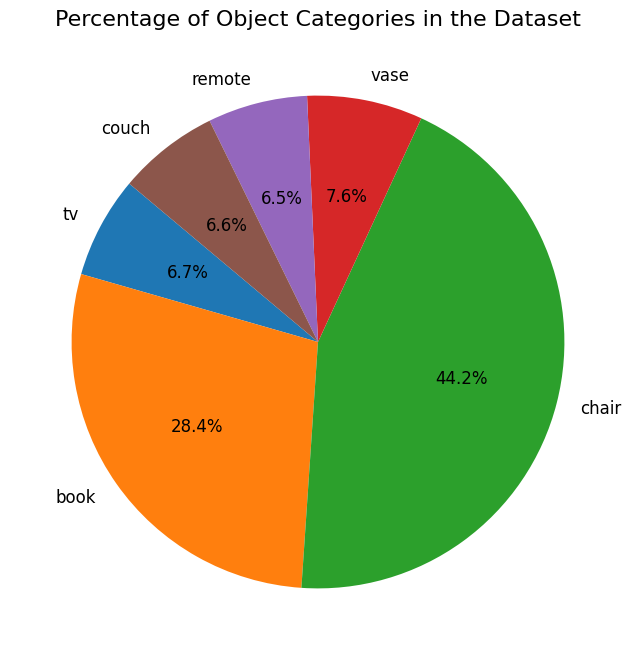

In [ ]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
labels = [category_names[cat_id] for cat_id in category_count.keys()]
sizes = [count for count in category_count.values()]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title('Percentage of Object Categories in the Dataset', fontsize=16)
plt.show()


Số lượng hình ảnh: 21837
Số lượng đối tượng được chú thích: 87106


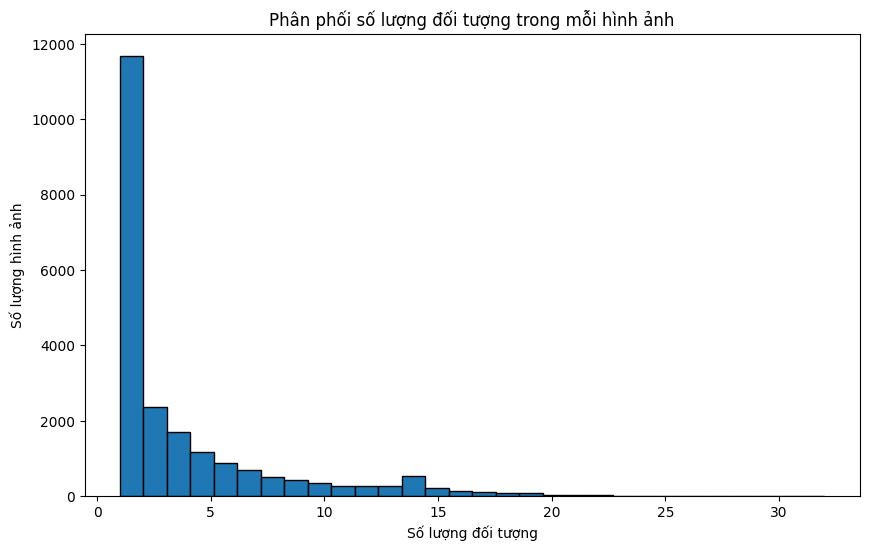

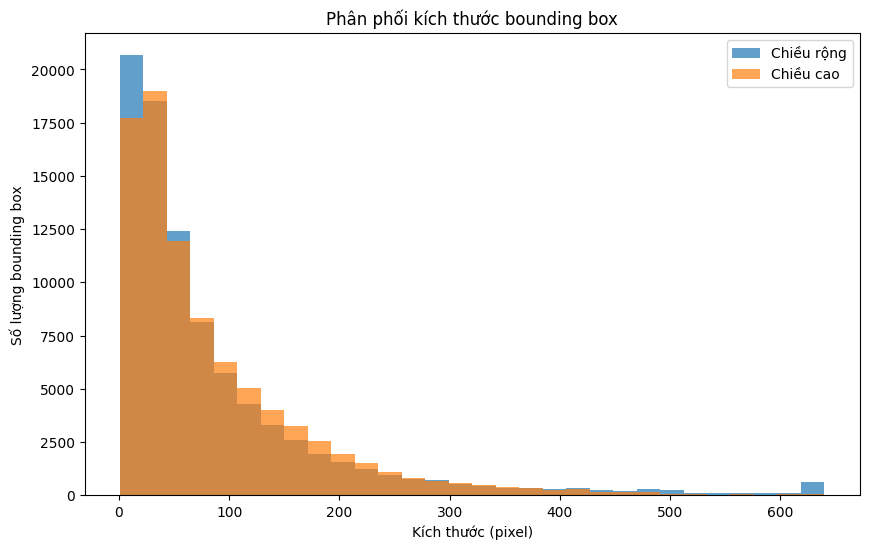

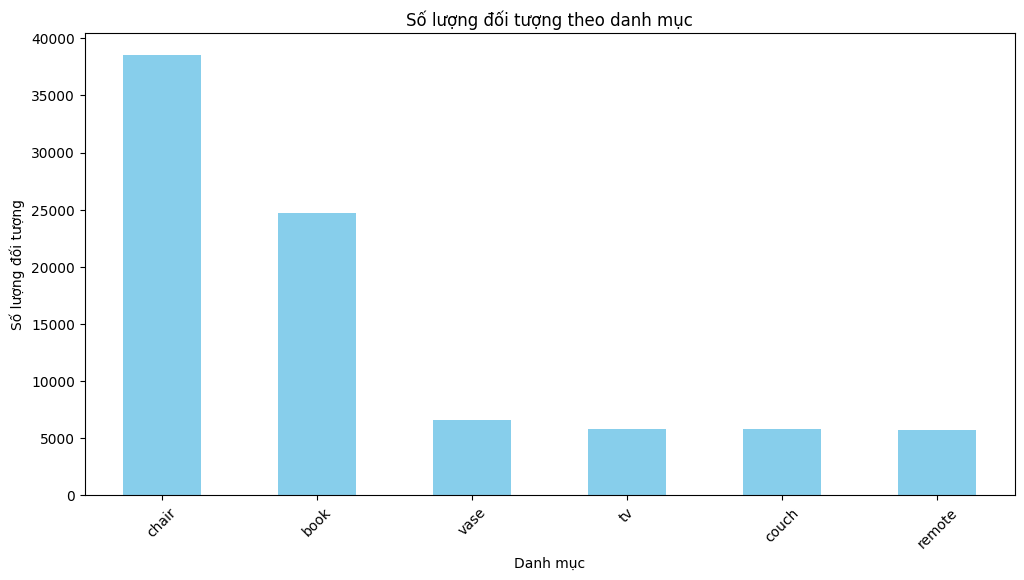

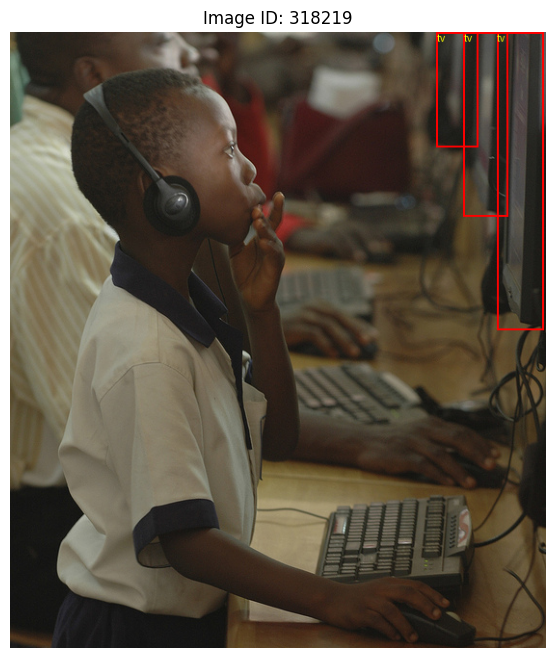

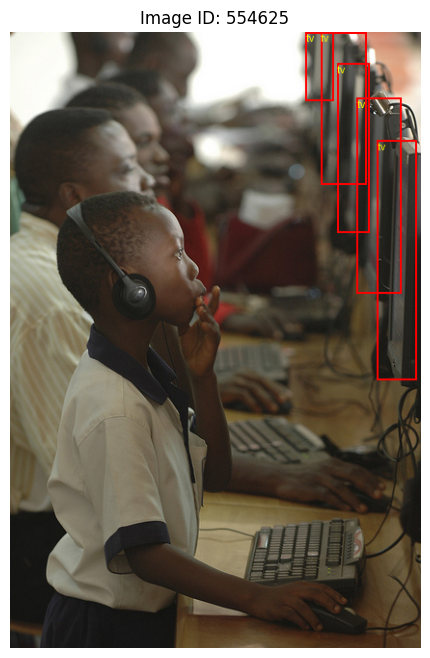

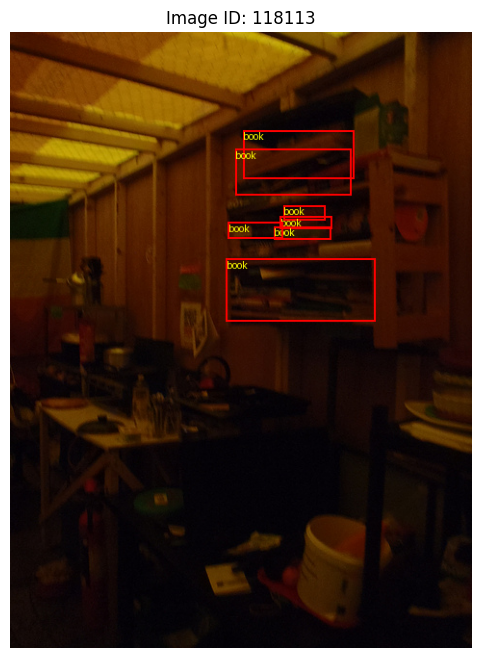

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
from PIL import Image, ImageDraw
import os
# Tổng quan dữ liệu
print(f"Số lượng hình ảnh: {len(os.listdir(image_dir))}")
print(f"Số lượng đối tượng được chú thích: {len(annotations['annotations'])}")

# Đếm số lượng đối tượng theo loại
category_count = Counter([ann["category_id"] for ann in annotations["annotations"]])
category_names = {cat["id"]: cat["name"] for cat in annotations["categories"]}

# Chuyển dữ liệu sang dạng DataFrame để dễ phân tích
annotations_df = pd.DataFrame(annotations["annotations"])
categories_df = pd.DataFrame(annotations["categories"])
images_df = pd.DataFrame(annotations["images"])

# Thống kê số lượng đối tượng trong mỗi hình ảnh
objects_per_image = annotations_df["image_id"].value_counts()

# Phân tích kích thước của bounding box
annotations_df["bbox_width"] = annotations_df["bbox"].apply(lambda x: x[2])
annotations_df["bbox_height"] = annotations_df["bbox"].apply(lambda x: x[3])

# 1. Phân phối số lượng đối tượng trên mỗi hình ảnh
plt.figure(figsize=(10, 6))
plt.hist(objects_per_image, bins=30, edgecolor='black')
plt.title("Phân phối số lượng đối tượng trong mỗi hình ảnh")
plt.xlabel("Số lượng đối tượng")
plt.ylabel("Số lượng hình ảnh")
plt.show()

# 2. Phân phối kích thước bounding box
plt.figure(figsize=(10, 6))
plt.hist(annotations_df["bbox_width"], bins=30, alpha=0.7, label='Chiều rộng')
plt.hist(annotations_df["bbox_height"], bins=30, alpha=0.7, label='Chiều cao')
plt.title("Phân phối kích thước bounding box")
plt.xlabel("Kích thước (pixel)")
plt.ylabel("Số lượng bounding box")
plt.legend()
plt.show()

# 3. Số lượng đối tượng theo danh mục
category_counts = annotations_df["category_id"].map(category_names).value_counts()
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Số lượng đối tượng theo danh mục")
plt.ylabel("Số lượng đối tượng")
plt.xlabel("Danh mục")
plt.xticks(rotation=45)
plt.show()

# 4. Hiển thị hình ảnh mẫu với bounding box
def plot_sample_image(image_id, annotations_df, images_df):
    # Lấy thông tin ảnh
    image_info = images_df[images_df["id"] == image_id].iloc[0]
    image_path = image_dir / image_info["file_name"]
    image = Image.open(image_path)

    # Vẽ bounding box
    draw = ImageDraw.Draw(image)
    for _, row in annotations_df[annotations_df["image_id"] == image_id].iterrows():
        bbox = row["bbox"]
        category_name = category_names[row["category_id"]]
        draw.rectangle(
            [(bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3])],
            outline="red",
            width=2
        )
        draw.text((bbox[0], bbox[1]), category_name, fill="yellow")

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image ID: {image_id}")
    plt.show()

# Hiển thị một số hình ảnh mẫu
sample_image_ids = annotations_df["image_id"].unique()[:3]
for image_id in sample_image_ids:
    plot_sample_image(image_id, annotations_df, images_df)


In [ ]:
# Chuyển đổi dữ liệu từ annotations thành DataFrame
annotations_df = pd.DataFrame(annotations["annotations"])
categories_df = pd.DataFrame(annotations["categories"])
images_df = pd.DataFrame(annotations["images"])

# Thêm cột kích thước bounding box
annotations_df["bbox_width"] = annotations_df["bbox"].apply(lambda x: x[2])
annotations_df["bbox_height"] = annotations_df["bbox"].apply(lambda x: x[3])

# Tính toán các số liệu cần thiết
total_images = len(images_df)
total_annotations = len(annotations_df)
total_categories = len(categories_df)
avg_objects_per_image = annotations_df["image_id"].value_counts().mean()
avg_bbox_width = annotations_df["bbox_width"].mean()
avg_bbox_height = annotations_df["bbox_height"].mean()

# In kết quả
print(f"Số lượng hình ảnh: {total_images}")
print(f"Số lượng đối tượng được chú thích: {total_annotations}")
print(f"Số lượng danh mục: {total_categories}")
print(f"Trung bình số đối tượng trên mỗi hình ảnh: {avg_objects_per_image:.2f}")
print(f"Trung bình chiều rộng bounding box: {avg_bbox_width:.2f}")
print(f"Trung bình chiều cao bounding box: {avg_bbox_height:.2f}")

Số lượng hình ảnh: 21837
Số lượng đối tượng được chú thích: 87106
Số lượng danh mục: 6
Trung bình số đối tượng trên mỗi hình ảnh: 3.99
Trung bình chiều rộng bounding box: 87.10
Trung bình chiều cao bounding box: 85.25


In [ ]:
# Chuyển đổi dữ liệu từ annotations thành DataFrame
annotations_df = pd.DataFrame(annotations["annotations"])
categories_df = pd.DataFrame(annotations["categories"])

# Thêm cột kích thước bounding box
annotations_df["bbox_width"] = annotations_df["bbox"].apply(lambda x: x[2])
annotations_df["bbox_height"] = annotations_df["bbox"].apply(lambda x: x[3])

# Map category names
category_names = {cat["id"]: cat["name"] for cat in annotations["categories"]}
annotations_df["category_name"] = annotations_df["category_id"].map(category_names)

# Thống kê theo loại đối tượng
stats = annotations_df.groupby("category_name").agg(
    object_count=("image_id", "count"),
    avg_height=("bbox_height", "mean"),
    max_height=("bbox_height", "max"),
    min_height=("bbox_height", "min"),
    avg_width=("bbox_width", "mean"),
    max_width=("bbox_width", "max"),
).reset_index()

# Đổi tên các cột để giống định dạng yêu cầu
stats = stats.rename(columns={
    "category_name": "Class",
    "object_count": "Object count",
    "avg_height": "Avg height (px)",
    "max_height": "Max height (px)",
    "min_height": "Min height (px)",
    "avg_width": "Avg width (px)",
    "max_width": "Max width (px)"
})

# Loại bỏ các cột không cần thiết
columns_to_keep = ["Class", "Object count", "Avg height (px)", "Max height (px)", "Min height (px)", "Avg width (px)", "Max width (px)"]
df_stats = stats[columns_to_keep]

df_stats

,Class,Object count,Avg height (px),Max height (px),Min height (px),Avg width (px),Max width (px)
0,book,24715,52.166509,632.00,1.53,54.227240,640.0
1,chair,38491,87.054532,640.00,0.82,81.960915,640.0
2,couch,5779,192.099839,640.00,5.71,265.761244,640.0
3,remote,5703,47.349181,619.86,1.05,55.107198,640.0
4,tv,5805,123.669742,628.39,4.66,137.725525,640.0
5,vase,6613,103.991205,631.37,2.04,66.936654,640.0
